**Aplicação de técnicas de classificação de texto na arquitetura de Chatbots hierárquicos**

**Mestrado Profissional em Computação Aplicada - PPCA - Universidade de Brasília**

**Disciplina**: Mineração de Dados

**Orientador**: Prof. Dr. Marcelo Ladeira <mladeira@unb.br>

**Alunos**: 
 - José Ronaldo Agra De Souza Filho <jose.agra@aluno.unb.br>
 - Bruno Gomes Resende <bruno.resende@aluno.unb.br>
 - Célio Castro Wermelinger <celio.wermelinger@aluno.unb.br> 

**Palavras-Chave:**

Chatbot; Text Classification; Machine Learning; Text Mining; NLP;

In [119]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret

## Importação das bibliotecas necessárias a este notebook.

In [120]:
# Import packages
import nltk
from nltk.corpus import stopwords
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from pycaret.classification import *
import pandas as pd

# download das stopwords para o idioma português
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Montagem dos datasets a serem utilizados no experimento

Cada categoria possui um arquivo contendo o texto que serve se exemplo de treinamento e a categoria de cada um desses textos.

Primeiro é montado um único dataset, contendo todos os exemplos das 3 classes, e as referidas categorias.

Após isso, este dataset é clonado 3 vezes, sendo um para cada classe. Nestes novos datasets, a categorizaçõ passa a ser binária. Ou seja, em vez de ter a informação das 3 classes, ele tem a informação se os exemplos de treinamento são ou não de uma referida classe.

Assim, cria-se os seguintes datasets:
* df_treino_covid: contém todos os exemplos de treinamento. Para os que representam a classe "covid", a coluna "category" é configurada com 1, caso contrário com 0.
* df_treino_seloturismo: contém todos os exemplos de treinamento. Para os que representam a classe "seloturismo", a coluna "category" é configurada com 1, caso contrário com 0.
* df_treino_tuberculose: contém todos os exemplos de treinamento. Para os que representam a classe "tuberculose", a coluna "category" é configurada com 1, caso contrário com 0.

In [121]:
# Montagem do dataset
df_covid = pd.read_csv('data/exemplos-treinamento-covid.csv', delimiter=';')
df_seloturismo = pd.read_csv('data/exemplos-treinamento-seloturismo.csv', delimiter=';')
df_tuberculose = pd.read_csv('data/exemplos-treinamento-tuberculose.csv', delimiter=';')
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)

# cria o dataframe de treino para a categoria covid
df_treino_covid = df_all.copy()
df_treino_covid.reset_index(drop=True, inplace=True)
df_treino_covid['category'] = df_all.reset_index().category.map({'covid':1, 'seloturismo':0, 'tuberculose':0})

# cria o dataframe de treino para a categoria seloturismo
#df_treino_seloturismo = df_all.copy()
#df_treino_seloturismo.reset_index(drop=True, inplace=True)
#df_treino_seloturismo['category'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':1, 'tuberculose':0})

# cria o dataframe de treino para a categoria tuberculose
#df_treino_tuberculose = df_all.copy()
#df_treino_tuberculose.reset_index(drop=True, inplace=True)
#df_treino_tuberculose['category'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':0, 'tuberculose':1})

## Representação dos textos em vetores

Realiza a representação de texto, fazendo uso do TF-IDF e realizando algumas tarefas de tratamento dos dados.

Ao realizar a vetorização dos textos, são removidas as stopwords e também os acentos das palavras.

Deciciu-se por não realizar as tarefas de "lemmatization" nem de "stemming", porque no caso deste experimento a simplificação de palavras em radicais poderia prejudicar o desempenho na identificação das classes.

In [122]:
# recupera as stopwords do idioma português
stop_words = stopwords.words('portuguese')

# Vetorização das palavras
cv = CountVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")
BoW = cv.fit_transform(df_treino_covid['input'])
BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names())
BoW_df['target_cat'] = df_all.reset_index().category.map({'covid':1, 'seloturismo':0, 'tuberculose':0})
BoW_df

,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,...,virilha,virus,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1038,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Criação dos classificadores binários

São criados 3 classificadores binários, cada um especializado em identificar uma das categorias existentes: covid, selo turismo e tuberculose.

Para cada classificador, a configuração utilizada será:
* Dados a classificar (data): dados relacionados à categoria COVID;
* Coluna que representa a classe (target): a coluna 'target_cat' que informa se o texto é da classe covid (1) ou não (0).
* Semente para possibilitar a reprodutibilidade (session_id): 20221
* Proporção do dataset que será usado para treinamento e validação (train_size): 70%
* Quantidade de dobras (folds) que será utilizada na validação cruzada (fold): 10 (por padrão a estratégia utilizada é a 'stratified kfold').
* Controle da entrada de confirmação de tipos de dados quando o setup é executado (silent): True (devido ao modo de execução automatizado).

## Classificador binário para a classe COVID

In [123]:
config_covid = setup(data=BoW_df, target='target_cat', fold=10)

,Description,Value
0,Session id,2677
1,Target,target_cat
2,Target type,Binary
3,Original data shape,"(1042, 1047)"
4,Transformed data shape,"(1042, 876)"
5,Transformed train set shape,"(729, 876)"
6,Transformed test set shape,"(313, 876)"
7,Numeric features,1046
8,Preprocess,True
9,Imputation type,simple


## Comparação entre os modelos disponíveis na biblioteca

Essa função treina todos os modelos disponíveis da biblioteca, e os pontua usando validação cruzada configurada no setup estratificada para avaliação de métricas.

A saída imprime uma grade de pontuação que mostra as métricas: acurácia média, AUC, recall, precisão e F1 de todos os modelos disponíveis na biblioteca de modelos.


In [124]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9780,0.0000,0.8765,0.9809,0.9228,0.9101,0.9140,0.0350
ada,Ada Boost Classifier,0.9753,0.9840,0.8492,0.9923,0.9091,0.8953,0.9027,0.1160
rf,Random Forest Classifier,0.9671,0.9852,0.7962,0.9900,0.8779,0.8595,0.8691,0.0970
et,Extra Trees Classifier,0.9657,0.9857,0.8045,0.9741,0.8744,0.8551,0.8645,0.0960
ridge,Ridge Classifier,0.9644,0.0000,0.7788,0.9889,0.8661,0.8462,0.8574,0.0390
gbc,Gradient Boosting Classifier,0.9644,0.9686,0.7795,0.9909,0.8689,0.8489,0.8592,0.1560
dt,Decision Tree Classifier,0.9643,0.8994,0.8053,0.9626,0.8718,0.8515,0.8592,0.0530
lr,Logistic Regression,0.9616,0.9980,0.7515,1.0000,0.8537,0.8324,0.8463,0.2150
nb,Naive Bayes,0.9602,0.9444,0.9212,0.8498,0.8788,0.8552,0.8598,0.0480
lda,Linear Discriminant Analysis,0.9547,0.9778,0.7598,0.9427,0.8384,0.8125,0.8207,0.0820


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2677, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Criando os modelos melhor pontuados na compare_models

In [125]:
# cria o modelo
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.0000,0.9091,1.0000,0.9524,0.9444,0.9459
1,0.9589,0.0000,0.8182,0.9000,0.8571,0.8332,0.8345
2,0.9726,0.0000,0.8182,1.0000,0.9000,0.8843,0.8903
3,0.9863,0.0000,0.9091,1.0000,0.9524,0.9444,0.9459
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9726,0.0000,0.8182,1.0000,0.9000,0.8843,0.8903
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9863,0.0000,0.9167,1.0000,0.9565,0.9484,0.9497
8,0.9452,0.0000,0.6667,1.0000,0.8000,0.7697,0.7910


In [126]:
# realiza o ensemble dos modelos e seleciona o melhor
melhor_modelo_ens = ensemble_model(svm, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9726,0.9861,0.8182,1.0000,0.9000,0.8843,0.8903
1,0.9726,0.9971,0.8182,1.0000,0.9000,0.8843,0.8903
2,0.9589,0.9076,0.7273,1.0000,0.8421,0.8192,0.8329
3,0.9863,1.0000,0.9091,1.0000,0.9524,0.9444,0.9459
4,0.9589,1.0000,0.7273,1.0000,0.8421,0.8192,0.8329
5,0.9726,0.9062,0.8182,1.0000,0.9000,0.8843,0.8903
6,0.9863,1.0000,0.9167,1.0000,0.9565,0.9484,0.9497
7,0.9863,1.0000,0.9167,1.0000,0.9565,0.9484,0.9497
8,0.9315,0.8750,0.5833,1.0000,0.7368,0.7006,0.7343


Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [127]:
# Imprimindo melhor modelo
print(melhor_modelo_ens)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2677, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


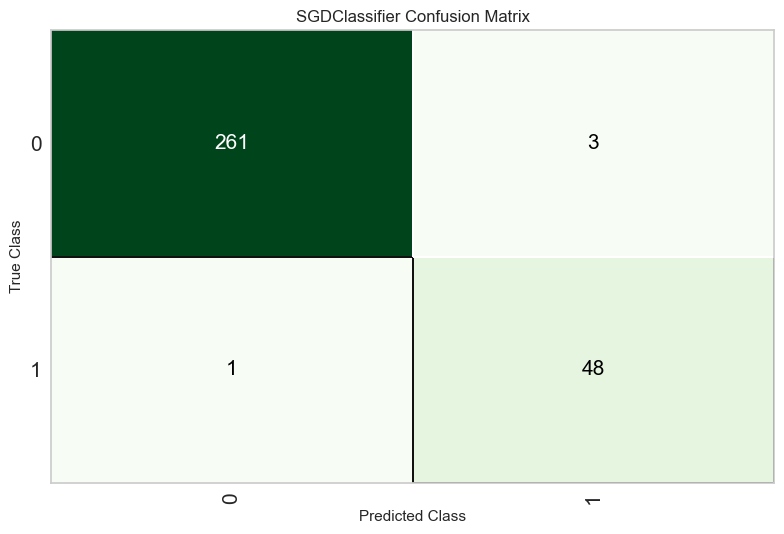

In [128]:
plot_model(melhor_modelo_ens, plot = 'confusion_matrix')

## Predição do modelo treinado

Antes de finalizar o modelo, realiza-se uma verificação final prevendo o conjunto de teste/hold-out e revisando as métricas de avaliação. Esta verificação é realizada com os 30% dos dados separados para isto no início deste notebook.

Perceba abaixo que não houve grande variação entre os resultados do teste/hold-out e do treinamento, inclusive as métricas do teste se apresentam melhores, isso indica que não ocorreu o overfitting.

In [129]:
predict_model(melhor_modelo_ens)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9872,0.9841,0.9796,0.9412,0.9600,0.9524,0.9527


,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acontece,acontecera,...,virus,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat,Label
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Finalização do modelo

A finalização do modelo é a última etapa do experimento. A função finalize_model() ajusta o modelo ao conjunto de dados completo, incluindo a amostra de teste/hold-out (30% neste caso). O objetivo dessa função é treinar o modelo no conjunto de dados completo antes de ser implantado na produção.

In [130]:
modelo_final = finalize_model(melhor_modelo_ens)
predict_model(modelo_final, data=BoW_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,...,virus,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1038,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Salvando o modelo final

Agora terminamos o experimento finalizando o modelo que agora está armazenado na variável 'modelo_final'.

Nosso modelo final pode ser descrito como:

Também usamos o modelo armazenado em final_rf para prever data_unseen. Isso nos leva ao final de nosso experimento, mas uma pergunta ainda deve ser feita: o que acontece quando você tem mais dados novos para prever? Você tem que passar por todo o experimento novamente? A resposta é não, a função embutida do PyCaret save_model() permite que você salve o modelo junto com todo o pipeline de transformação para uso posterior.

In [131]:
save_model(modelo_final,'models/20220911-modelo-final-covid-bow-svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\bruno\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['abdomen', 'abracar', 'abraco',
                                              'acesso', 'acho', 'acionar',
                                              'acometer', 'acometidos',
                                              'acompanhamento', 'acontece',
                                              'acontecera', 'acordo', 'acougue',
                                              'acrescido', 'acrescimo',
                                              'acrescimos', 'aderi', 'aderir',
                                              'aderiram', 'ad...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
          